<span style="font-family:Comic Sans MS; color: #FFE933; font-size: 30px">Product Sales analysis</span>

<strong><p style="font-family:Comic Sans MS; color: blue">This is a practice exercise that Edgar did during the recap class on Wednesday 21st, here the link to the recorded class:</p></strong>https://www.youtube.com/watch?v=1POa0UfmBi8&list=PLjMIC_h0rNV1uXwxF3djOOPxsAv0-6fcl&index=11

<strong><p style="font-family:Comic Sans MS; color: blue">I have added the exercises Edgar did along with some others to complement the exercise which I considered interesting to analyze the dataset. Feel free to suggest others.
</p></strong>


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

<strong><span style="color: #FF33F0">Load the data from csv file</span></strong>

In [3]:
data = pd.read_csv('./PRODUCT SALES.csv')

<strong><span style="color: #FF33F0">Get the shape of the dataset</span></strong>

In [9]:
data.shape

(113036, 16)

<strong><span style="color: #FF33F0">Display first 5 rows</span></strong>

In [4]:
data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Age_Group_NUMBER,Customer_Gender,Country,Product_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,01-01-17,1,January,2017,17,Youth (<25),1,M,canada,Bikes,2,1519.0,2443.0,1848.0,3038.0,4886.0
1,01-01-17,1,January,2017,23,Youth (<25),1,M,Australia,Bikes,2,1252.0,2295.0,2086.0,2504.0,4590.0
2,01-01-17,1,January,2017,33,Young Adults (25-34),1,F,France,Bikes,2,2171.0,3578.0,2814.0,4342.0,7156.0
3,01-01-17,1,January,2017,39,Adults (35-64),1,M,United States,Bikes,2,713.0,1120.0,814.0,1426.0,2240.0
4,01-01-17,1,January,2017,42,Adults (35-64),1,M,United States,Bikes,2,344.0,540.0,392.0,688.0,1080.0


<strong><span style="color: #FF33F0">Display the column names</span></strong>

In [10]:
data.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Age_Group_NUMBER', 'Customer_Gender', 'Country', 'Product_Category',
       'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost',
       'Revenue'],
      dtype='object')

<strong><span style="color: #FF33F0">Let's get some basic statistic information about the dataset</span></strong>

In [33]:
data.describe()

,Day,Year,Customer_Age,Age_Group_NUMBER,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.0,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2019.520153,35.919212,1.0,11.901660,267.296366,452.938427,372.681358,469.318695,842.000053
std,8.781567,1.179704,11.021936,0.0,9.561857,549.835483,922.071219,595.080571,884.866118,1466.202934
min,1.000000,2017.000000,17.000000,1.0,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000
25%,8.000000,2019.000000,28.000000,1.0,2.000000,2.000000,5.000000,39.000000,28.000000,70.000000
50%,16.000000,2019.500000,35.000000,1.0,10.000000,9.000000,24.000000,135.000000,108.000000,245.000000
75%,23.000000,2021.000000,43.000000,1.0,20.000000,42.000000,70.000000,432.000000,432.000000,880.000000
max,31.000000,2021.000000,87.000000,1.0,32.000000,2171.000000,3578.000000,26158.000000,42978.000000,69136.000000


<strong><p style="color: blue">For some types of data, count sometimes doesn't make sense like since we are going to have the same result (count of rows). However it is useful for numerical values like Customer_Age has sense to have the mean for example. So we have interesting data such as the Customer_Age mean, the min (17) and max (87) age of customers.<br>
Also we can assume that customer age is distributed as Normal Distribution (Gaussian Bell) with a mean of 35 and std of 11. Let's plot the results using scipy.stats  
</p></strong>

<strong><span style="color: #FF33F0">Let's plot the customer age data</span></strong>

Axes(0.125,0.11;0.775x0.77)


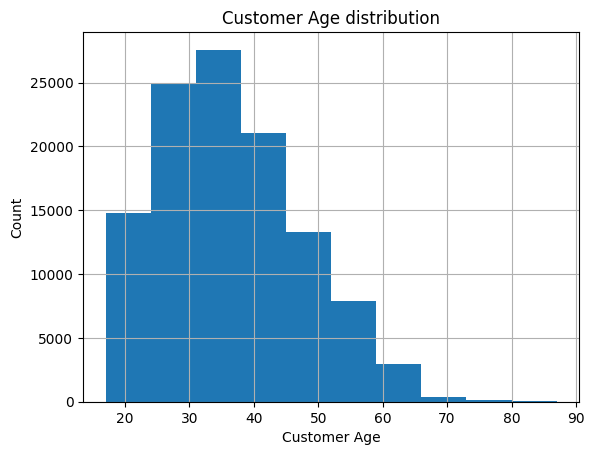

In [42]:
## We assume there is a normal distribution so we proceed as below:
# age_mean = np.mean(data['Customer_Age'])
# age_std = np.std(data['Customer_Age'])

# normal_numbers = stats.norm.rvs(loc= age_mean, scale= age_std, size=10000)
# plt.hist(normal_numbers)
## However, when we plot the above we don't see the real data, in the sense there are values below 17 and above 87 which are the min and max, respectively

# Therefore, by plotting the data as below, we see the real distribution of data
plt.xlabel('Customer Age')
plt.ylabel('Count')
plt.title('Customer Age distribution')
print(data['Customer_Age'].hist()) # also we can write  plt.hist(data.Customer_Age)

<strong><span style="color: #FF33F0">What type of products does the dataset have?</span></strong>

In [25]:
data['Product_Category'].unique()

array(['Bikes', 'Accessories', 'Clothing'], dtype=object)

<strong><span style="color: #FF33F0">Now show the count the products</span></strong>

In [46]:
data['Product_Category'].value_counts()

Product_Category
Accessories    70120
Bikes          25982
Clothing       16934
Name: count, dtype: int64

<strong><span style="color: #FF33F0">Is there a difference in profit for gender?</span></strong>

In [48]:
# mean profit for Male
mean_profit_male = data[data['Customer_Gender'] == 'M']['Profit'].mean()
mean_profit_female = data[data['Customer_Gender'] == 'F']['Profit'].mean()
print(mean_profit_male)
print(mean_profit_female)

368.4095726437097
377.23322491045974


<strong><span style="color: blue">We want to test the above data and confirm there is a . The null hypothesis is there is no difference between profit for gender, and the alternative hypothesis is that there is significant difference.</span></strong>
<br>
<br>
<strong><span style="color: #FF33F0">Let's test the profit for gender data using T-Test</span></strong>

In [50]:
group_1 = data[data['Customer_Gender'] == 'M']['Profit']
group_2 = data[data['Customer_Gender'] == 'F']['Profit']

stats.ttest_ind(group_1, group_2)
# considering a significance value of 0.05 we can confirm there is a difference due to the pvalue is less than 0.05

TtestResult(statistic=-2.4913922626943656, pvalue=0.012725777563722436, df=113034.0)

<strong><span style="color: #FF33F0">In which countries do we sell the products?</span></strong>

In [13]:
data['Country'].unique()

array(['canada', 'Australia', 'France', 'United States', 'United Kingdom',
       'Germany'], dtype=object)

<strong><span style="color: #FF33F0">Display profit by countries</span></strong>

In [20]:
print(data.groupby('Country')['Profit'].sum())
print(' ')
print('The country with the highest profit is', data.groupby('Country')['Profit'].sum().idxmax(), 'with a profit of', data.groupby('Country')['Profit'].sum().max())
print(' ')

Country
Australia         10901557.0
France             4294623.0
Germany            4363602.0
United Kingdom     4857663.0
United States     13912871.0
canada             3796094.0
Name: Profit, dtype: float64
 
The country with the highest profit is United States with a profit of 13912871.0
 


<strong><span style="color: #FF33F0">Display the distribution of products by country</span></strong>

In [26]:
data.groupby(['Country', 'Product_Category'])['Order_Quantity'].sum()

Country         Product_Category
Australia       Accessories         203062
                Bikes                10156
                Clothing             50367
France          Accessories         101433
                Bikes                 3812
                Clothing             23750
Germany         Accessories          98682
                Bikes                 4173
                Clothing             22865
United Kingdom  Accessories         122364
                Bikes                 4833
                Clothing             30021
United States   Accessories         374749
                Bikes                11192
                Clothing             91598
canada          Accessories         153872
                Bikes                 2245
                Clothing             36142
Name: Order_Quantity, dtype: int64

<strong><span style="color: #FF33F0">Which country has the highest bikes sales?</span></strong>

In [31]:
print('The country with the highest amount of bikes sold is', data[data['Product_Category'] == 'Bikes'].groupby('Country')['Order_Quantity'].sum().idxmax(), 'with a total of', data[data['Product_Category'] == 'Bikes'].groupby('Country')['Order_Quantity'].sum().max())

The country with the highest amount of bikes sold is United States with a total of 11192


<strong><p style="font-family:Comic Sans MS; color: blue">Now let's perform some more hypothesis testing using ANOVA test to analyze the profit differences on Age_Group and Country</p></strong>

<strong>
<p style="color: #FF33F0">
Perform a one-way ANOVA test to compare the means of profit for each country
    <ul style="color: #FF33F0">
        <li>Null Hypothesis: There is no significant difference between the means of profit for each country</li>
        <li>Alternative Hypothesis: There is significant difference between the means of profit for each country</li>
    </ul>
</p></strong>

In [52]:
countries = data['Country'].unique()  # unique country names list 
countries_profit = {}  # initialize an empty dictionary that will store the profit values for each country
for country in countries:
    countries_profit[country] = data[data['Country'] == country]['Profit']

f_statistic, p_value = stats.f_oneway(*countries_profit.values())  
# the * operator is used to unpack this collection of values into separate arguments because the f_oneway function expects each group of values
# to be passed as a separate argument, not as a single collection of groups
print(f'F-Statistic: {f_statistic}, P-Value: {p_value}')

# Our conclusions baseed on the p-value taking account of alpha=0.05
if p_value < 0.05:
    print('Reject the null hypothesis: there is a significant difference the means of profit for each country')
else:
    print('Fail to reject the null hypothesis: there is no significant difference betweent the means of profit for each country')

F-Statistic: 196.06289744987376, P-Value: 8.970606044577626e-209
Reject the null hypothesis: there is a significant difference the means of profit for each country


<strong>
<p style="color: #FF33F0">
Perform a one-way ANOVA test to compare the means of profit for each the age groups
    <ul style="color: #FF33F0">
        <li>Null Hypothesis: There is no significant difference between the means of profit for each age group</li>
        <li>Alternative Hypothesis: There is significant difference between the means of profit for each age group</li>
    </ul>
</p></strong>

In [54]:
print(data['Age_Group'].unique())
age_groups = data['Age_Group'].unique()
age_groups_profit = {}
for age_group in age_groups:
    age_groups_profit[age_group] = data[data['Age_Group'] == age_group]['Profit']

f_statistic, p_value = stats.f_oneway(*age_groups_profit.values())
print(f'F-Statistic: {f_statistic}, P-Value: {p_value}')

# Our conclusions baseed on the p-value taking account of alpha=0.05
if p_value < 0.05:
    print('Reject the null hypothesis: there is a significant difference the means of profit for each age group')
else:
    print('Fail to reject the null hypothesis: there is no significant difference betweent the means of profit for each age group')

['Youth (<25)' 'Young Adults (25-34)' 'Adults (35-64)' 'Seniors (64+)']
F-Statistic: 57.56806492529572, P-Value: 3.5410961589774696e-37
Reject the null hypothesis: there is a significant difference the means of profit for each age group
